In [1]:
import os
from pathlib import Path
import pandas as pd
import vaex
import vaex.ml
import matplotlib.pyplot as plt
import seaborn as sns

dir = Path().cwd()
csv = os.path.join(dir, 'output', 'gtfsr_combined_csv.csv')

In [2]:
if not os.path.exists(csv+'.hdf5'):
    df = vaex.from_csv(csv, convert=True, copy_index=False, chunk_size=1000000)
df = vaex.open(csv+'.hdf5')
df.head()

#,trip_id,start_date,start_time,stop_sequence,departure,arrival,timestamp,lon,lat
0,11777.2.60-13-b12-1.22.I,2.02101e+07,18:00:00,1,0,0,2021-01-09 19:28:02,0.930786,-0.112593
1,11756.2.60-13-b12-1.22.I,2.02101e+07,18:15:00,1,0,0,2021-01-09 19:28:02,0.930786,-0.112593
2,11370.2.60-13-b12-1.23.I,2.02101e+07,19:00:00,1,0,0,2021-01-09 19:28:02,0.930786,-0.112593
3,11379.2.60-13-b12-1.19.O,2.02101e+07,18:00:00,1,0,0,2021-01-09 19:28:02,0.932315,-0.109583
4,11394.2.60-13-b12-1.19.O,2.02101e+07,18:15:00,1,0,0,2021-01-09 19:28:02,0.932315,-0.109583
5,8595.2.60-4-b12-1.5.O,2.02101e+07,18:30:00,1,0,0,2021-01-09 19:28:02,0.932315,-0.109583
6,8566.2.60-4-b12-1.5.O,2.02101e+07,18:45:00,1,0,0,2021-01-09 19:28:02,0.932315,-0.109583
7,11401.2.60-13-b12-1.19.O,2.02101e+07,18:45:00,1,0,0,2021-01-09 19:28:02,0.932315,-0.109583
8,11662.2.60-27B-b12-1.97.I,2.02101e+07,19:00:00,1,0,0,2021-01-09 19:28:02,0.932315,-0.109583
9,8924.2.60-4-b12-1.5.O,2.02101e+07,19:00:00,1,0,0,2021-01-09 19:28:02,0.932315,-0.109583


In [3]:
df.describe().T

,dtype,count,NA,mean,std,min,max
trip_id,str,3100815,0,--,--,--,--
start_date,int64,3100815,0,20210125.550535586,57.727268,20210109,20210131
start_time,str,3100815,0,--,--,--,--
stop_sequence,int64,3100815,0,19.221815877438672,19.569987,1,92
departure,int64,3100815,0,47.56165072730879,525.344468,-14640,6660
arrival,int64,3100815,0,45.852622616957156,517.844698,-14640,6660
timestamp,str,3100815,0,--,--,--,--
lon,float64,3100815,0,0.9307963153415795,0.00136,0.926412,0.935605
lat,float64,3100815,0,-0.10907009084322164,0.001667,-0.115451,-0.105672


In [4]:
df

#,trip_id,start_date,start_time,stop_sequence,departure,arrival,timestamp,lon,lat
0,11777.2.60-13-b12-1.22.I,20210109,18:00:00,1,0,0,2021-01-09 19:28:02,0.9307856422222316,-0.112592634936091
1,11756.2.60-13-b12-1.22.I,20210109,18:15:00,1,0,0,2021-01-09 19:28:02,0.9307856422222316,-0.112592634936091
2,11370.2.60-13-b12-1.23.I,20210109,19:00:00,1,0,0,2021-01-09 19:28:02,0.9307856422222316,-0.112592634936091
3,11379.2.60-13-b12-1.19.O,20210109,18:00:00,1,0,0,2021-01-09 19:28:02,0.9323151396966098,-0.1095830133123873
4,11394.2.60-13-b12-1.19.O,20210109,18:15:00,1,0,0,2021-01-09 19:28:02,0.9323151396966098,-0.1095830133123873
...,...,...,...,...,...,...,...,...,...
"3,100,810",4019.10447.2-76-gad-1.67.I,20210131,23:25:00,31,-120,-120,2021-01-31 23:57:43,0.9300938156686116,-0.1111662507782495
"3,100,811",7791.10447.2-270-gad-1.235.I,20210131,23:40:00,1,0,0,2021-01-31 23:57:43,0.9318992722701834,-0.1115625707141637
"3,100,812",7791.10447.2-270-gad-1.235.I,20210131,23:40:00,6,60,60,2021-01-31 23:57:43,0.932067467446198,-0.1119520695404478
"3,100,813",7791.10447.2-270-gad-1.235.I,20210131,23:40:00,1,0,0,2021-01-31 23:58:50,0.9318992722701834,-0.1115625707141637


In [108]:

one_trip = df[df.trip_id == '17155.4.60-40-b12-1.206.O'][df.start_date == 20210119][df.start_time == '17:30:00']
encoder = vaex.ml.LabelEncoder(features=['timestamp'], prefix='cat_')
one_trip = encoder.fit_transform(one_trip)
one_trip
# encoder.labels_

#,trip_id,start_date,start_time,stop_sequence,departure,arrival,timestamp,lon,lat,cat_timestamp
0,17155.4.60-40-b12-1.206.O,20210119,17:30:00,1,0,0,2021-01-19 17:02:11,0.932059733267816,-0.1100309065284128,4
1,17155.4.60-40-b12-1.206.O,20210119,17:30:00,1,0,0,2021-01-19 17:03:13,0.932059733267816,-0.1100309065284128,79
2,17155.4.60-40-b12-1.206.O,20210119,17:30:00,1,0,0,2021-01-19 17:04:14,0.932059733267816,-0.1100309065284128,65
3,17155.4.60-40-b12-1.206.O,20210119,17:30:00,1,0,0,2021-01-19 17:05:19,0.932059733267816,-0.1100309065284128,85
4,17155.4.60-40-b12-1.206.O,20210119,17:30:00,1,0,0,2021-01-19 17:06:16,0.932059733267816,-0.1100309065284128,11
...,...,...,...,...,...,...,...,...,...,...
"3,264",17155.4.60-40-b12-1.206.O,20210119,17:30:00,77,0,0,2021-01-19 18:48:36,0.9310562277745156,-0.1118173863556054,103
"3,265",17155.4.60-40-b12-1.206.O,20210119,17:30:00,78,0,0,2021-01-19 18:48:36,0.9310871358539528,-0.1118060099037882,103
"3,266",17155.4.60-40-b12-1.206.O,20210119,17:30:00,79,0,0,2021-01-19 18:48:36,0.931124594038748,-0.1117917663672936,103
"3,267",17155.4.60-40-b12-1.206.O,20210119,17:30:00,80,0,0,2021-01-19 18:48:36,0.9311500458087668,-0.1117829510685784,103


In [109]:
gb = one_trip.groupby(['trip_id', 'start_date', 'start_time', 'stop_sequence'], \
    agg={
        'departure': vaex.agg.first('departure', 'departure'),
        'arrival': vaex.agg.first('arrival', 'arrival'),
        'lat': vaex.agg.first('lat', 'lat'),
        'lon': vaex.agg.first('lon', 'lon'),
        'timestamp': vaex.agg.first('cat_timestamp', 'cat_timestamp')
    })
gb

#,trip_id,start_date,start_time,stop_sequence,departure,arrival,lat,lon,timestamp
0,17155.4.60-40-b12-1.206.O,20210119,17:30:00,1,-60,0,-0.1100309065284128,0.932059733267816,0
1,17155.4.60-40-b12-1.206.O,20210119,17:30:00,2,0,-60,-0.1100090294273482,0.9320026355309896,1
2,17155.4.60-40-b12-1.206.O,20210119,17:30:00,11,-60,-60,-0.1101548688780348,0.9318393627256748,1
3,17155.4.60-40-b12-1.206.O,20210119,17:30:00,12,0,-60,-0.1101709968613506,0.9318097855280312,1
4,17155.4.60-40-b12-1.206.O,20210119,17:30:00,13,0,0,-0.1101759566186324,0.9317706381572464,1
...,...,...,...,...,...,...,...,...,...
68,17155.4.60-40-b12-1.206.O,20210119,17:30:00,77,0,0,-0.1118173863556054,0.9310562277745156,1
69,17155.4.60-40-b12-1.206.O,20210119,17:30:00,78,0,0,-0.1118060099037882,0.9310871358539528,1
70,17155.4.60-40-b12-1.206.O,20210119,17:30:00,79,0,0,-0.1117917663672936,0.931124594038748,1
71,17155.4.60-40-b12-1.206.O,20210119,17:30:00,80,0,0,-0.1117829510685784,0.9311500458087668,1


In [107]:
# encoder.labels_


<AxesSubplot:xlabel='lat', ylabel='lon'>

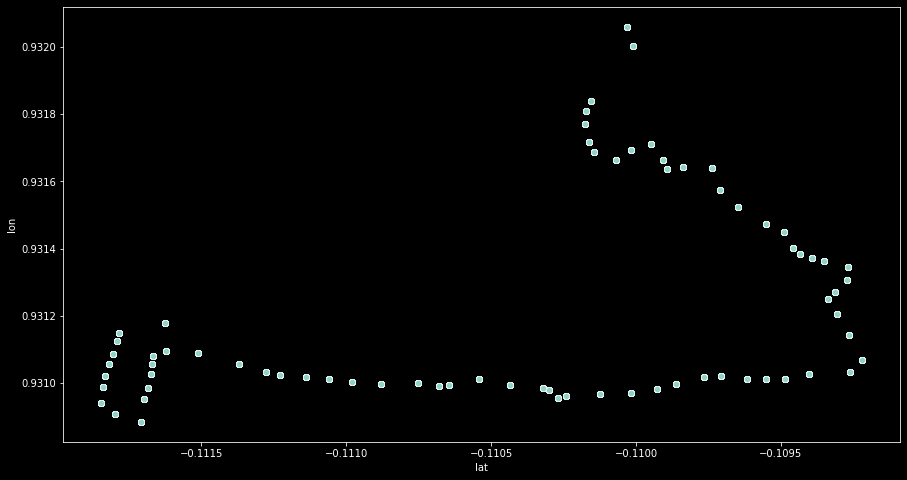

In [8]:
pd_trip = one_trip.to_pandas_df()
plt.figure(figsize = (15,8))
sns.scatterplot(pd_trip['lat'], pd_trip['lon'])

<AxesSubplot:xlabel='departure', ylabel='Count'>

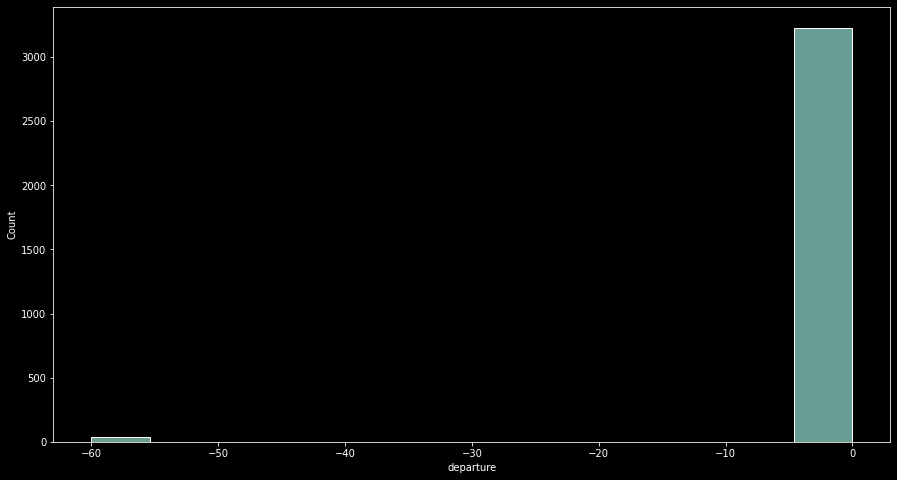

In [9]:
plt.figure(figsize = (15,8))
sns.histplot(pd_trip['departure'])